# 1 工具集

Numpy：多维数组、向量、矩阵运算
SciPy：科学算法，包括线性代数、稀疏矩阵、信号和图像处理、最优化、快速傅里叶变换等
pandas：Numpy的补充，复杂表格和时间序列数据处理
Scikit-learn：所有机器学习可能用到的工具集（出自谷歌）
Matplotlib：绘图组件
Statsmodels：SciPy补充，包括线性模型、离散选择模型、时间序列分析、参数非参数检验等
Beautiful Soup：HTML XML解析器
NetworkX：现实生活网络数据处理和显示（2D和3D），还包括许多图度量和算法
NLTK：自然语言工具箱，包括语料和词汇库，以及分词、词性标注、识别等
Gensim：大型文本集合分析、潜在语义分析、通过LDA主题建模、word2vec算法（出自谷歌，文本转换为矢量特征）

In [10]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

例1：波士顿房价数据预测

In [19]:
boston_dataset = datasets.load_boston()  # 波士顿房价数据
x_full = boston_dataset.data
Y = boston_dataset.target
print(x_full.shape)
print(Y.shape)
#print(bostom_dataset.DESCR)

(506, 13)
(506,)


因为x和y必须是一一对应关系，维度必须一致，才能进行接下来平面绘图。所以，需要在x的高维度中，选取最能表征x的特征的数据

In [16]:
selector = SelectKBest(f_regression, k=1)
selector.fit(x_full, Y)
x = x_full[:,selector.get_support()]
print(x.shape)

(506, 1)


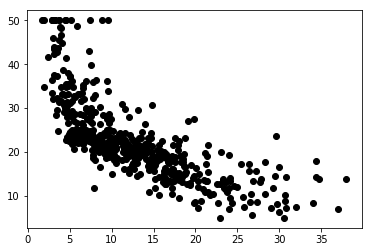

In [22]:
plt.scatter(x,Y,color='black')
plt.show()

我们的目标，是要找到一个模型，使得能模拟所有的数据点。这个过程也即是回归，首先尝试使用线性回归模型

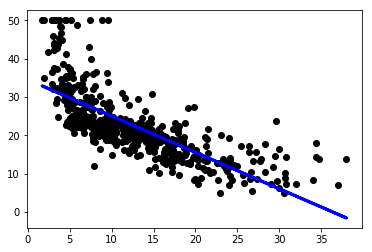

In [20]:
regressor = LinearRegression(normalize=True)
regressor.fit(x,Y)
plt.scatter(x,Y,color='black')
plt.plot(x,regressor.predict(x),color='blue',linewidth=3)
plt.show()

由于点的密集分布，可以很明显的看出，在0~5之间的数据和30~35之间的数据偏远，可以看出点的分布不是线性的，用线性回归模拟有偏差。
这里尝试使用SVR（支持向量回归）模型，来尝试模拟，它可以模拟任意维度的任意数据点，做法是升维，让高维度产生一个平面，使得所有点离平面距离最近

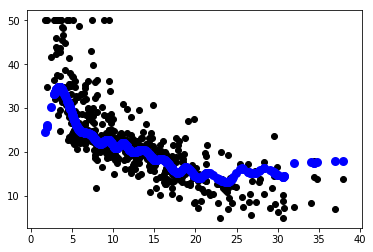

In [38]:
regressor = SVR(gamma='auto')
regressor.fit(x,Y)
plt.scatter(x,Y,color='black')
plt.scatter(x,regressor.predict(x),color='blue',linewidth=3)
plt.show()

相比于线性回归和支持向量回归，随机森林回归可以覆盖更复杂的数据点模型

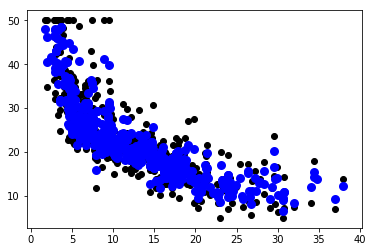

In [36]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x,Y)
plt.scatter(x,Y,color='black')
plt.scatter(x,regressor.predict(x),color='blue',linewidth=3)
plt.show()

例2：鸢尾花卉类别识别。有三个类别的鸢尾花卉：
setosa
versicolor
virginica
每种花卉有四个属性：花萼长度、花萼宽度、花瓣长度、花瓣宽度。通过这4个属性来预测是哪一种类别

In [44]:
from sklearn import datasets
iris = datasets.load_iris()
#print(iris.DESCR)
#print(iris.data)
print(iris.data.shape)
print(iris.target)    # data每一个所属的分类
print(iris.target.shape)
print(iris.target_names)
print(iris.feature_names)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


pandas.DataFrame可以存储一个表格，并且按照表格来绘制。绘制方式是两两组合

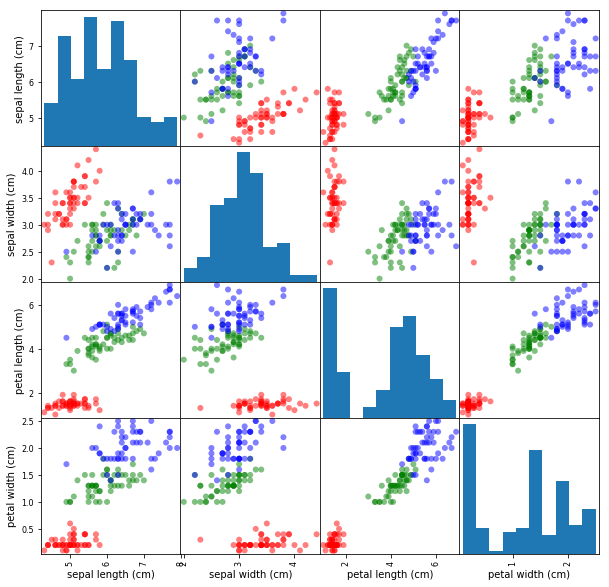

In [45]:
import pandas as pd
import numpy as np
colors = list()
palette = {0:"red",1:"green",2:"blue"}
for c in np.nditer(iris.target):        # 迭代器
    colors.append(palette[int(c)])
dataframe = pd.DataFrame(iris.data, columns = iris.feature_names)
scatterplot = pd.plotting.scatter_matrix(dataframe, alpha=0.5,figsize=(10,10),diagonal='hist',color=colors,marker='o',grid=True)

# 2 数据加载

从url获取数据集

In [8]:
from sklearn.datasets import load_svmlight_file
from urllib.request import urlopen
target_page = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a'
a2a = urlopen(target_page)
x_train, y_train = load_svmlight_file(a2a)
print(x_train.shape)
print(y_train.shape)

(1605, 119)
(1605,)


从csv文件获取数据集

In [45]:
import numpy as np
import pandas as pd
import csv
#cars = np.loadtxt('cars_dataset.csv',delimiter=',',dtype=str)  # 要求数据集中所有数据类型一致，都为str
cars = pd.read_csv('cars_dataset.csv',sep=',')
#cars = pd.read_table('cars_dataset.csv',sep=',')
#print(cars)

#iris = np.loadtxt('iris_dataset.csv',delimiter=',')  # err，不是所有数据类型都是一致的
#iris = pd.read_csv('iris_dataset.csv',sep=',')
#%timeit iris = pd.read_csv('iris_dataset.csv',sep=',',header=None, names=['sepal_length','sepal_width','petal_length','petal_width','target'])
#print(iris)
#print(type(iris))

#iris_data = iris.values[:,:4]  # DataFrame转换成np数组
#print(iris_data)
#iris_target, iris_target_labels = pd.factorize(iris.target)
#print(iris_target)
#print(iris_target_labels)

with open('iris_dataset.csv', 'r') as data_stream:
    #for n, row in enumerate(csv.DictReader(data_stream,fieldnames=['sepal_length','sepal_width','petal_length','petal_width','target'],dialect='excel')):
    for n, row in enumerate(csv.reader(data_stream,dialect='excel')):
        if n<=1:
            print(n,row)
        else:
            break;

0 ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
1 ['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']


从db里读取数据

In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('Media_db.db')

# 原生态方法
#cur = conn.cursor()
#cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
#tables = cur.fetchall()
#print(tables)

# 使用pandas方法
query = "SELECT name FROM sqlite_master WHERE type='table'"
tables = pd.read_sql_query(query,conn)
print(tables)

conn.close()

             name
0        Branding
1  DependencyData
2      EULA_Files
3     PayloadData
4        Payloads
5   SuitePayloads
6          Suites
7        EULA_Ref
8    EULA_Content
9        pcd_meta


分类数据映射成二进制数值

In [6]:
import pandas as pd

categorical_feature = pd.Series(['sunny','cloudy','snow','rain','foggy'])
mapping = pd.get_dummies(categorical_feature)
print(mapping)

   cloudy  foggy  rain  snow  sunny
0       0      0     0     0      1
1       1      0     0     0      0
2       0      0     0     1      0
3       0      0     1     0      0
4       0      1     0     0      0


文本数据英文单词数量统计和词频统计

In [50]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['sci.med','sci.space']
twenty_sci_news = fetch_20newsgroups(categories = categories)
#print(twenty_sci_news.data[0])
print(twenty_sci_news.filenames)
print(twenty_sci_news.target_names)
print(twenty_sci_news.target[0], twenty_sci_news.target_names[twenty_sci_news.target[0]])

count_vect = CountVectorizer()
word_count = count_vect.fit_transform(twenty_sci_news.data)  # 为文档创建特征矢量
print(word_count.shape)

txt = ['i love data science, but it is hard. i need to work hard more.']
txt_count = count_vect.fit_transform(txt)
word_list = count_vect.get_feature_names()
print(txt_count.shape)
#print(dir(type(count_vect)))
#print(count_vect.get_feature_names())
#print(txt_count)
print('''
单词个数统计''')
for n in txt_count[0].indices:
    print(word_list[n],txt_count[0,n])

print('''
词频统计''')
tf_vect = TfidfVectorizer(use_idf=False, norm='l1')
#tf_vect = TfidfVectorizer()
word_freq = tf_vect.fit_transform(txt)
word_list= tf_vect.get_feature_names()
for n in word_freq[0].indices:
    print(word_list[n],word_freq[0,n])

['C:\\Users\\cmoni\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\61116'
 'C:\\Users\\cmoni\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.med\\58122'
 'C:\\Users\\cmoni\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.med\\58903'
 ...
 'C:\\Users\\cmoni\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\60774'
 'C:\\Users\\cmoni\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\60954'
 'C:\\Users\\cmoni\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.med\\58911']
['sci.med', 'sci.space']
1 sci.space
(1187, 25638)
(1, 11)

单词个数统计
more 1
work 1
to 1
need 1
hard 2
is 1
it 1
but 1
science 1
data 1
love 1

词频统计
more 0.08333333333333333
work 0.08333333333333333
to 0.08333333333333333
need 0.08333333333333333
hard 0.16666666666666666
is 0.08333333333333333
it 0.08333333333333333
but 0.08333333333333333
science 0.08333333333333333
data 0.08333333333333333
love 0.08333333333333333


# 数据处理

数据分布情况

   sepal_length  sepal_width  petal_length  petal_width       flower
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


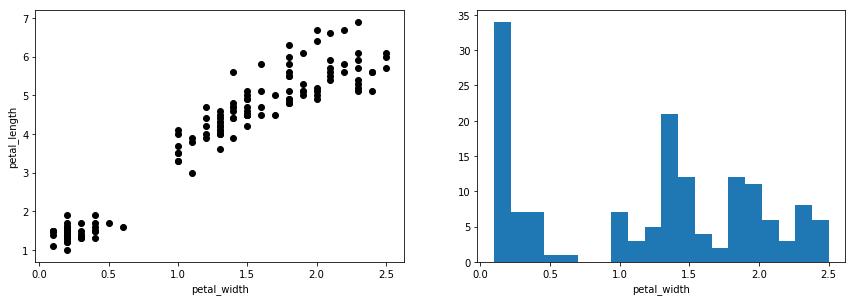

In [51]:
# import pandas as pd
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt

iris = pd.read_csv('iris_dataset.csv')
print(iris.head())
print(iris.describe())

ax = plt.subplot(1,2,1)
plt.subplots_adjust(top=1,right=2)

plt.scatter(iris['petal_width'],iris['petal_length'],alpha=1.0,color='k')
plt.xlabel('petal_width')
plt.ylabel('petal_length')

ax = plt.subplot(1,2,2)
plt.subplots_adjust(top=1,right=2)

plt.hist(iris['petal_width'],bins=20)
plt.xlabel('petal_width')
plt.show()